<a href="https://colab.research.google.com/github/matheustonietti/ProvaIA/blob/main/Regress%C3%A3o_Linear_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear com Python

Seu vizinho é um corretor de imóveis e quer ajuda para prever os preços dos imóveis para regiões dos EUA. Seria ótimo se você pudesse criar um modelo que dadas algumas características de uma casa ele retornasse uma estimativa de por quanto a casa deve vendida.

Ele perguntou se você poderia ajudá-lo com suas novas habilidades de ciência de dados. Você diz que sim e decide que a Regressão Linear pode ser um bom caminho para resolver esse problema!

Seu vizinho então lhe dá algumas informações sobre um monte de casas em regiões dos Estados Unidos, está tudo no conjunto de dados: USA_Housing.csv.

Os dados contêm as seguintes colunas:

* 'Avg. Area Income': média da renda dos moradores da cidade onde a casa está localizada
* 'Avg. Area House Age': idade média das casas na mesma cidade
* 'Avg. Area Number of Rooms': Número médio de cômodos das casas na mesma cidade
* 'Avg. Area Number of Bedrooms': Número médio de quartos das casas na mesma cidade
* 'Area Population': população da cidade em que a casa está localizada
* 'Price': preço a que a casa foi vendida
* 'Address': Endereço da casa

**Vamos começar!**
##Confira os dados

Conseguimos obter alguns dados do seu vizinho para preços de moradias como um conjunto csv, vamos preparar nosso ambiente com as bibliotecas que precisamos e depois importar os dados!

### Importe as Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Confira os Dados

In [ ]:
# Esse trecho do código é obrigatório para quem estiver fazendo tudo pelo colab
# Caso você esteja utilizando o jupyter pode comentar/apagar
import os
from google.colab import drive
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing_df = pd.concat([housing.data,housing.target], axis=1)


In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Não há datasets faltando

Podemos notar no dataset que o mesmo não possuí dados faltando, todas as coluna estão preenchidas corretamente.


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

#Exploratory Data Analysis (EDA)

Vamos criar alguns gráficos simples para conferir os dados!

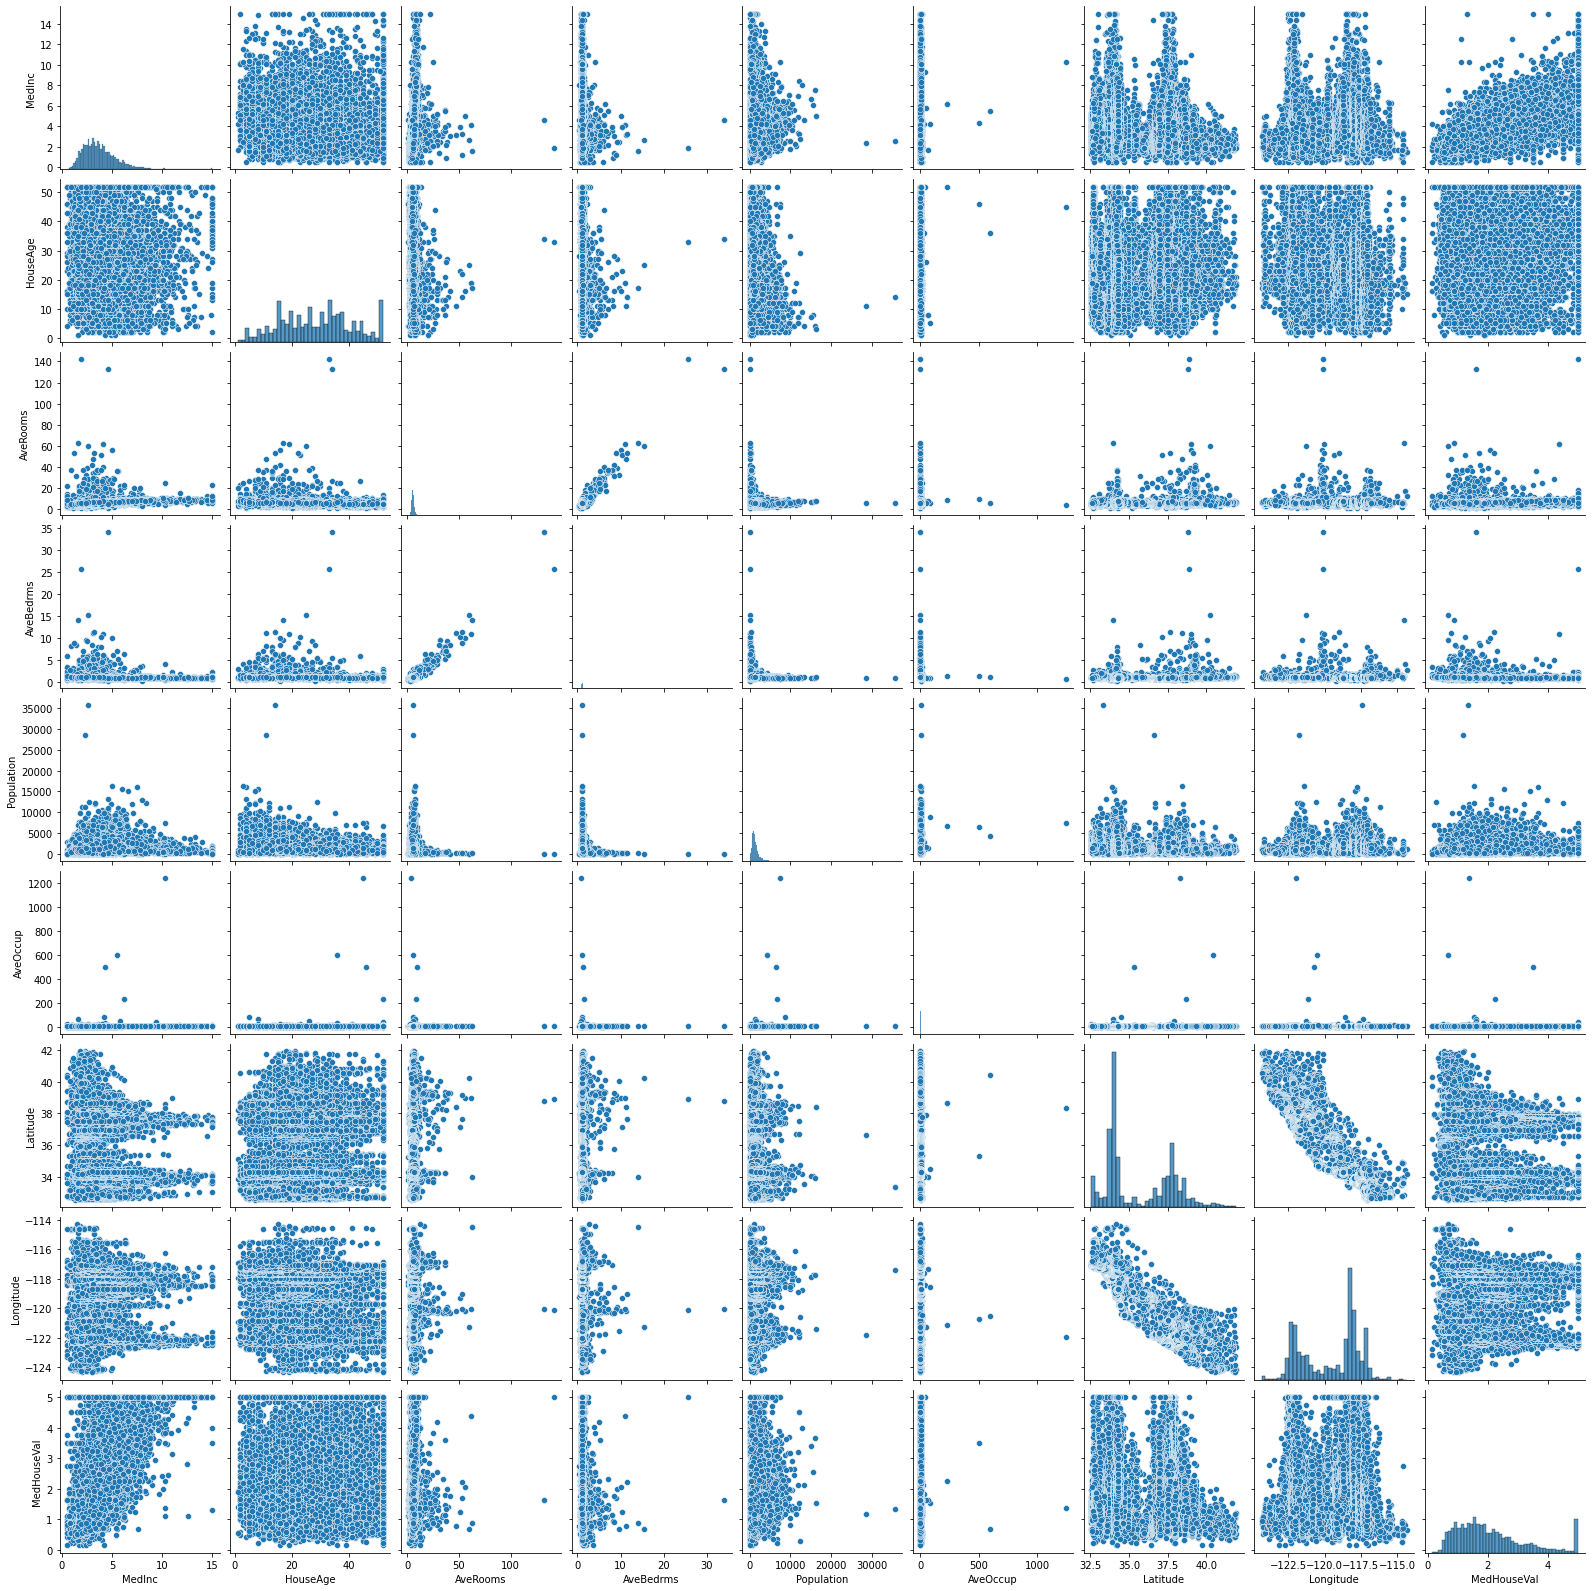

In [ ]:
sns.pairplot(housing_df)

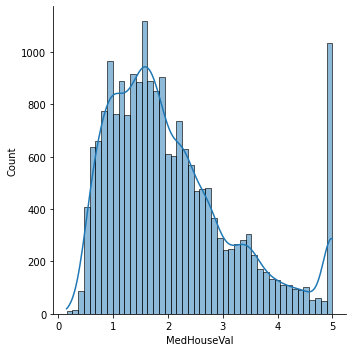

In [ ]:
sns.displot(housing_df['MedHouseVal'],kde=True)

##Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão! Precisaremos primeiro dividir nossos dados em um array X que contém os recursos para treinar e um array y com a variável de destino, neste caso a coluna Price. Iremos descartar a coluna Endereço porque ela tem apenas informações de texto que o modelo de regressão linear não pode usar.

###Arrays X e y

In [ ]:
X = housing_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

y = housing_df['MedHouseVal']

##Train Test Split

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de teste. Vamos treinar o modelo no conjunto de treinamento e, em seguida, usar o conjunto de teste para avaliar o modelo.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=125)

##Criando e Treinando o modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

##Avaliação do Modelo

Vamos avaliar o modelo verificando seus coeficientes e como podemos interpretá-los.

In [ ]:
print(lm.intercept_)

-38.02203329652558


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['ValorMedio'])
coeff_df

,ValorMedio
MedInc,0.426960
HouseAge,0.009539
AveRooms,-0.096370
AveBedrms,0.577814
Population,-0.000007
AveOccup,-0.003488
Latitude,-0.437091
Longitude,-0.448676


    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

##Previsões do nosso modelo

Vamos pegar as previsões do nosso conjunto de testes e ver o quão bem ele se saiu!

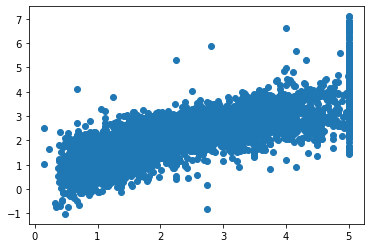

In [ ]:
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)

Sim, podemos traçar uma reta calculando a menor distancia entre os pontos

**Histograma Residual**

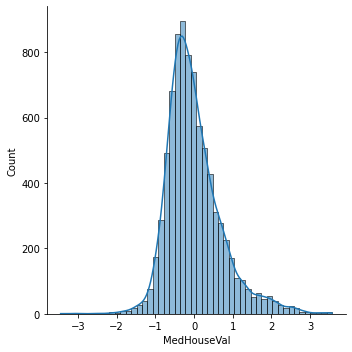

In [ ]:
sns.displot((y_test-predictions),bins=50,kde=True)

##Métricas de Avaliação de Regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean Absolute Error** (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros ao quadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros ao quadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando essas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque o MSE "pune" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular que o MSE, porque o RMSE é interpretável nas unidades de "y".

Todas essas são **funções de perda** (loss functions), porque queremos minimizá-las.

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  0.5314144000294646
MSE:  0.5065006770483771
RMSE:  0.7116886096098328
